In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("../data/raw/ruddit.csv", usecols=["txt", "offensiveness_score"])
df = df.rename(columns={"txt": "comment", "offensiveness_score": "score"})

In [3]:
df.head(2)

,comment,score
0,> The difference in average earnings between m...,-0.083
1,"The myth is that the ""gap"" is entirely based o...",-0.022


In [4]:
print("---- Comentarios de apoyo ----")
[print("[Comment Score]", c[0], c[1]) for c in df.loc[df.score < -0.5].sample(n=3, random_state=2).values];

---- Comentarios de apoyo ----
[Comment Score] Queens of The Stone Age.  -0.688
[Comment Score] Thanks and good luck! You can do it!! -0.667
[Comment Score] It's not a direct comparison, you're right.  -0.63


In [5]:
print("---- Discursos de odio ----")
[print("[Comment Score]", c[0], c[1]) for c in df.loc[df.score > 0.7].sample(n=3, random_state=2).values];

---- Discursos de odio ----
[Comment Score] Nope.  If the wife gets to fuck someone else, do do you. 0.708
[Comment Score] haha, right? The fuck was his statement even thinking? "Yea, let's crush the economy just a little more!" 0.717
[Comment Score] Don’t fuck a rope. 0.708


--- Distribución de la variable objetivo (datos originales) ---


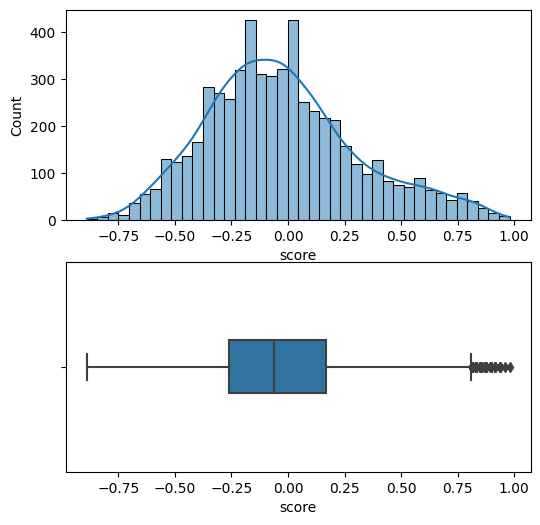

In [39]:
print("--- Distribución de la variable objetivo (datos originales) ---")
fig, ax = plt.subplots(2, figsize=(6, 6))
sns.histplot(df.score, kde=True, ax=ax[0]);
sns.boxplot(data=df, x="score", width=.25, ax=ax[1]);

In [7]:
# Hay comentarios que ya se han borrado (Valores [deleted] or [removed])
ccount = df.comment.value_counts()
ccount[ccount > 1]

[deleted]    116
[removed]     12
Name: comment, dtype: int64

In [8]:
# Borramos los comentarios eliminados
df = df[~df.comment.isin(["[deleted]", "[removed]"])]
print("Numero de comentarios:", df.shape[0])

Numero de comentarios: 5710


In [61]:
# Convertimos a minúsculas? En el campo del análisis de sentimientos puede ser útil mantener las mayúsculas
df.comment = df.comment.str.lower()
# [print("[" + str(i) + "]", t) for i, t in enumerate(df[df.score > .25].comment)];

In [52]:
# Carácter &#x200b; - Caracter UNICODE que representa el espacio. NO UTIL
df[df.comment.str.contains("&#x200b;")].shape[0]

26

In [81]:
search = [" r/", " /r/", " u/", " /u/"]
# [print("[" + str(i) + "]", "[SCORE:] "+ str(t[1]) + " -", t[0]) for i, t in enumerate(df[df.comment.str.contains("|".join(search))].values)]
df[df.comment.str.contains("|".join(search))].shape[0]

43

In [ ]:
# TODO: Mapear acrónimos de internet

In [14]:
# TODO: Montamos un modelo baseline como punto de partida